<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*

## Notebook 5: Finding the zero of a function

Finding the zero of a function is a very common task in exploratory computing. In mathematics it is also called *root finding*. The `scipy` package contains a number of methods to find the (approximate) value of the zero of a function of one or more variables. In this Notebook, we will program two methods ourselves, the Bisection method and Newton's method. At the end of the Notebook, we use the corresponding functions of `scipy` to obtain the same results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Bisection method
The Bisection method is a simple method to find the zero of a function. The user needs to specify the function $f(x)$ and two values of $x$ between which $f(x)$ is zero - let's call those two points $x_1$ and $x_2$. As $f(x)$ equals zero somewhere between $x_1$ and $x_2$, that means that $f(x)$ is positive at $x_1$ or $x_2$ and negative at the other one. In other words, the product of the two function values is negative: $f(x_1)f(x_2)<0$. If this condition is fulfilled, all we know is that $f(x)$ is zero somewhere in the interval between $x_1$ and $x_2$ (provided $f(x)$ is continuous, of course). The basic idea of the Bisection method is to iterate towards the zero of the function by cutting the interval in half every iteration. This is done by computing the middle between $x_1$ and $x_2$, let's call that point $x_m$, and compute $f(x_m)$. Next, replace either $x_1$ or $x_2$ by $x_m$ making sure that $f(x)$ remains negative at one of the two values and positive at the other. Repeat the process until the interval is small enough. In summary, the algorithm works as follows:

1. Compute $f(x)$ at $x_1$ and $x_2$ and make sure that $f(x_1)f(x_2)<0$.
2. Compute $x_m = \frac{1}{2}(x_1+x_2)$.
3. Compute $f(x_m)$.
4. If $f(x_m)f(x_2)<0$, replace $x_1$ by $x_m$, otherwise, replace $x_2$ by $x_m$.
5. Test whether $|x_1-x_2|<\varepsilon$, where $\varepsilon$ is a user-specified tolerance. If this is not yet the case, return to step 2.

Recall that a function may simply be passed as the argument to another function in Python. The example below contains a function called `square_me` that returns the square of any function of one variable, evaluated at the provided value of $x$. As an example, `square_me` is used with the `cos` function

In [2]:
def square_me(func, x):
    return func(x) ** 2
print('result of square_me function:', square_me(np.cos, 4))
print('directly taking the square  :', np.cos(4) ** 2)

result of square_me function: 0.427249983096
directly taking the square  : 0.427249983096


### Exercise 1. <a name="back1"></a>
Write a Python function for $f(x)=\frac{1}{2}-\text{e}^{-x}$. Create a plot of $f(x)$ for $x$ varying from 0 to 4. Notice that $f(x)$ has a zero somewhere on the plotted interval (for this example it isn't really that hard to determine the zero exactly, of course, and we will do that later on to test whether our code works correctly).

<a href="#ex1answer">Answers to Exercise 1</a>

### Exercise 2. <a name="back2"></a>Bisection method
Implement the bisection method in a function called `bisection`. Your `bisection` method should take the following arguments:

1. The function for which you want to find the zero.
2. $x_1$ and $x_2$
3. The tolerance `tol` used as a stopping criterion. Make `tol` a keyword argument with a default value of 0.001.
4. The maximum number of iterations `nmax`. Make `nmax` a keyword argument with a default value of, for example, 10.

Your function should return the value of $x$ where $f(x)$ equals (approximately) zero. Your function should print a warning to the screen when the maximum number of iterations is reached before the tolerance is met.

In writing your code, implement steps 2-5 of the algorithm explained above in a regular loop that you perform `nmax` times and break out of the loop (using the `break` command) when the tolerance is met. Doing it this way will prevent you from getting stuck in an infinite loop, which may happen if you use a `while` loop. 
In writing your code it is advisable to print the values of $x_1$, $x_2$, $f(x_1)$, and $f(x_2)$ to the screen every iteration, so you can see how your `bisection` function performs (or whether you have any bugs left). 

Use your `bisection` method to find the zero of the function $f(x)$ you programmed in Step 1 and make sure it is within `tol=0.001` of the exact value. 

Demonstrate that your `bisection` method works correctly by finding the zero of cos($x$) between $x_1=0$ and $x_2=3$ running the following command:

`bisection(np.cos, 0, 3, tol=1e-6, nmax=30)`

<a href="#ex2answer">Answers to Exercise 2</a>

### Newton's method

The Bisection method is a brute-force method that is guaranteed to work when the user specifies an interval from $x_1$ to $x_2$ that contains a zero (and the function is continuous). The Bisection method is not very efficient (it requires a lot of function evaluations) and it is inconvienient that the user has to specify an interval that contains the zero. A smarter alternative is Newton's method (also called the Newton-Raphson method), but it is, unfortunately, not guaranteed that it always works, as is explained below. 

Let's try to find the zero of the function represented by the blue line in the graph below. Newton's method starts at a user-defined starting location, called $x_0$ here and shown with the blue dot. A straight line is fitted through the point $(x,y)=(x_0,f(x_0))$ in such a way that the line is tangent to $f(x)$ at $x_0$ (the red line). The intersection of the red line with the horizontal axis is the next estimate $x_1$ of the zero of the function (the red dot). This process is continued until a value of $f(x)$ is found that is sufficiently small. Hence, a straight line is fitted through the point $(x,y)=(x_1,f(x_1))$, again tangent to the function, and the intersection of this line with the horizontal axis is the next best estimate of the zero of the function, etc., etc.


<img src="http://i.imgur.com/tK1EOtD.png" alt="Newton's method on wikipedia">

The equation for a straight line with slope $a$ and through the point $x_n,f(x_n)$ is

$$y = a(x-x_n) + f(x_n)$$

As we want the line to be tangent to the function $f(x)$ at the point $x=x_n$, the slope $a$ is equal to the derivative of $f(x)$ at $x_n$: $a=f'(x_n)$. To find the intersection of the line with the horizontal axis, we have to find the value of $x$ that results in $y=0$. This is our next estimate $x_{n+1}$ of the zero of the function. Hence we need to solve

$$0 = f'(x_n) (x_{n+1}-x_n) + f(x_n)$$

which gives

$$\boxed{x_{n+1} = x_n - f(x_n)/f'(x_n)}$$

The search is completed when $|f(x)|$ is below a user-specified tolerance.
A nice animated illustration of Newton's method can be found on wikipedia (we will learn how to make cool animations like this in a later Notebook).

<img src="http://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif" alt="Newton's method on wikipedia" width="400px">

Newton's method is guaranteed to find the zero of a function if the function is *well behaved* and you start your search *close enough* to the zero. If those two conditions are met, Newton's method is very fast. If they are not met, the method does not converge to the zero. Another disadvantage of Newton's method is that you need to define the derivative of the function. Strangely enough, the function value doesn't have to go down every iteration (as is illustated in animation above going from $x_2$ to $x_3$).

### Exercise 3. <a name="back3"></a>Newton's method
Implement Newton's method in a Python function called `newtonsmethod` and test your function by finding the zero of $f(x)=\frac{1}{2}-\text{e}^{-x}$, as we used in Exercise 1. Use $x_0=1$ as the starting point of your search. The `newtonsmethod` function should take the following arguments:

1. The function for which you want to find the zero.
2. The derivative of the function for which you want to find the zero.
3. The starting point of the search $x_0$.
4. The tolerance `tol` used as a stopping criterion. Make `tol` a keyword argument with a default value of $10^{-6}$.
5. The maximum number of iterations `nmax`. Make `nmax` a keyword argument with a default value of 10.

Your function should return the value of $x$ where $f(x)$ equals (approximately) zero. Your function should print a warning to the screen when the maximum number of iterations is reached before the tolerance is met. 

It is suggested that during development of your script, you print the value of $x_{n+1}$ and the corresponding function value to the screen every iteration so you know whether your function is making good progress. If you implement everything correctly, you should find a zero that gives a function value less than $10^{-6}$ within 3 iterations if you start at $x=1$. How many iterations do you need when you start at $x=4$?

<a href="#ex3answer">Answers to Exercise 3</a>

### Exercise 4. <a name="back4"></a>
Demonstrate that your `newton` function works by finding the zero of $\sin(x)$. As you know, the $\sin(x)$ function has many zeros: $-2\pi$, $-\pi$, $0$, $pi$, $2\pi$, etc. Which zero do you find when starting at $x=1$ and which zero do you find when starting at $x=1.5$?

<a href="#ex4answer">Answers to Exercise 4</a>

### Root finding methods in `scipy`
The package `scipy.optimize` includes a number of routines for the minimization of a function and to find the zeros of a function. Two of the rootfinding methods are called, no suprise, `bisect` and `newton`. But possibly the most popular root finding method is called `fsolve`. `fsolve` has as additional advantage that is will estimate the derivative of the function for you if you cannot (or don't want to) do it yourself. `fsolve` can even be used to find an (approximate) answer for a system of non-linear equations, but we won't do that here. 

### Exercise 5.<a name="back5"></a> `fsolve` 
Use the `fsolve` method of the `scipy.optimize` package to find the $x$ value for which $\ln(x^2)=2$ (i.e., find the zero of the function $\ln(x^2)-2$), and demonstrate that your value of $x$ indeed gives $\ln(x^2)=2$.

<a href="#ex5answer">Answers to Exercise 5</a>

### Exercise 6.<a name="back6"></a> Plot the zero
Plot the function $f(x)=x+2\cos(x)$ for $x$ going from -2 to 4. On the same graph, plot a red dot at the location where $f(x)=0$. Obviously, you need to find this location with one of the methods you learned in this Notebook. 

<a href="#ex6answer">Answers to Exercise 6</a>

### Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

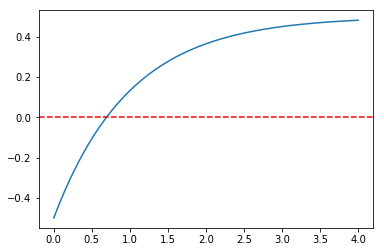

In [3]:
def f(x):
    return 0.5 - np.exp(-x)

x = np.linspace(0, 4, 100)
y = f(x)
plt.plot(x, y)
plt.axhline(0, color='r', ls='--')

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

In [4]:
def bisection(func, x1, x2, tol=1e-3, nmax=10, silent=True):
    f1 = func(x1)
    f2 = func(x2)
    assert f1 * f2< 0, 'Error: zero not in interval x1-x2'
    for i in range(nmax):
        xm = 0.5*(x1 + x2)
        fm = func(xm)
        if fm * f2 < 0:
            x1 = xm
            f1 = fm
        else:
            x2 = xm
            f2 = fm
        if silent is False: print(x1, x2, f1, f2)
        if abs(x1 - x2) < tol:
            break
    if abs(func(x1)) > tol:
        print('Maximum number of iterations reached')
    return x1

In [5]:
xzero = bisection(func=f, x1=0, x2=4, nmax=20)  
print('zero of function and function value: ', xzero, f(xzero))  

zero of function and function value:  0.6923828125 -0.000382330131828


In [6]:
xzero = bisection(func=np.cos, x1=0, x2=3, tol=1e-6, nmax=30)
print('cos(x) is zero between 0 and pi at:', xzero)
print('relative error:', (xzero - np.pi / 2) / (np.pi / 2))

cos(x) is zero between 0 and pi at: 1.570796012878418
relative error: -1.9984543714192042e-07


<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

In [7]:
def fp(x):
    return np.exp(-x)

In [8]:
def newtonsmethod(func, funcp, xs, tol=1e-6, nmax=10, silent=True):
    f = func(xs)
    for i in range(nmax):
        fp = funcp(xs)
        xs = xs - f/fp
        f = func(xs)
        if silent is False: print(xs, func(xs))
        if abs(f) < tol: 
            print('tolerance reached in', i+1, 'iterations')
            break
    if abs(f) > tol:
        print('Max number of iterations reached before convergence')
    return xs

In [9]:
print('starting at x=1')
xzero = newtonsmethod(func=f, funcp=fp, xs=1)
print('xzero, f(xzero) ', xzero, f(xzero))

print('starting at x=4')
xzero = newtonsmethod(func=f, funcp=fp, xs=4, nmax=40)
print('xzero, f(xzero) ', xzero, f(xzero))

starting at x=1
tolerance reached in 3 iterations
xzero, f(xzero)  0.693146278462 -4.5104915336e-07
starting at x=4
tolerance reached in 28 iterations
xzero, f(xzero)  0.693147180453 -5.36808375529e-11


<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

In [10]:
xzero = newtonsmethod(func=np.sin, funcp=np.cos, xs=1)
print('starting point is x=1')
print('xzero, sin(xzero):', xzero, np.sin(xzero))

xzero = newtonsmethod(func=np.sin, funcp=np.cos, xs=1.5)
print('starting point is x=1.5')
print('xzero, sin(xzero):', xzero, np.sin(xzero))
print('xzero / pi:', xzero / np.pi)

tolerance reached in 4 iterations
starting point is x=1
xzero, sin(xzero): 2.92356620141e-13 2.92356620141e-13
tolerance reached in 3 iterations
starting point is x=1.5
xzero, sin(xzero): -12.5663706144 -1.28649811974e-15
xzero / pi: -4.0


<a href="#back4">Back to Exercise 4</a>

<a name="ex5answer">Answers to Exercise 5</a>

In [11]:
from scipy.optimize import fsolve
def h(x):
    return np.log(x ** 2) - 2

x0 = fsolve(h, 1)
print('x0, function value', x0, h(x0))

x0, function value [ 2.71828183] [ -1.02140518e-14]


<a href="#back5">Back to Exercise 5</a>

<a name="ex6answer">Answers to Exercise 6</a>

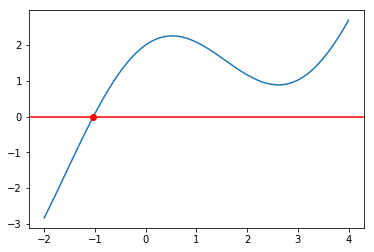

In [12]:
from scipy.optimize import fsolve
def g(x):
    return x + 2 * np.cos(x)
x = np.linspace(-2, 4, 100)
x0 = fsolve(g, 1)
plt.plot(x, g(x))
plt.plot(x0, g(x0), 'ro')
plt.axhline(y=0, color='r')

<a href="#back6">Back to Exercise 6</a>